In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('mushrooms.csv')

x = df.drop('class',axis=1)
x = pd.get_dummies(x,drop_first=True)
y = df['class']

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=101)

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators':[50,100],
             'learning_rate':[0.1,0.05,0.2],
             'max_depth':[3,4,5]}
gb_model =GradientBoostingClassifier()
grid = GridSearchCV(gb_model,param_grid)
grid.fit(x_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100]})

In [10]:
from sklearn.metrics import confusion_matrix,classification_report
predictions = grid.predict(x_test)
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}

In [11]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       444
           p       1.00      1.00      1.00       369

    accuracy                           1.00       813
   macro avg       1.00      1.00      1.00       813
weighted avg       1.00      1.00      1.00       813



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]),
 [Text(0, 0, 'population_c'),
  Text(1, 0, 'population_v'),
  Text(2, 0, 'stalk-color-above-ring_c'),
  Text(3, 0, 'cap-surface_g'),
  Text(4, 0, 'ring-number_o'),
  Text(5, 0, 'cap-color_y'),
  Text(6, 0, 'stalk-color-below-ring_c'),
  Text(7, 0, 'stalk-color-below-ring_y'),
  Text(8, 0, 'stalk-root_e'),
  Text(9, 0, 'spore-print-color_u'),
  Text(10, 0, 'spore-print-color_h'),
  Text(11, 0, 'ring-type_p'),
  Text(12, 0, 'odor_p'),
  Text(13, 0, 'gill-size_n'),
  Text(14, 0, 'gill-spacing_w'),
  Text(15, 0, 'odor_f'),
  Text(16, 0, 'odor_l'),
  Text(17, 0, 'stalk-surface-below-ring_y'),
  Text(18, 0, 'spore-print-color_r'),
  Text(19, 0, 'stalk-root_r'),
  Text(20, 0, 'bruises_t'),
  Text(21, 0, 'stalk-root_c'),
  Text(22, 0, 'odor_n')])

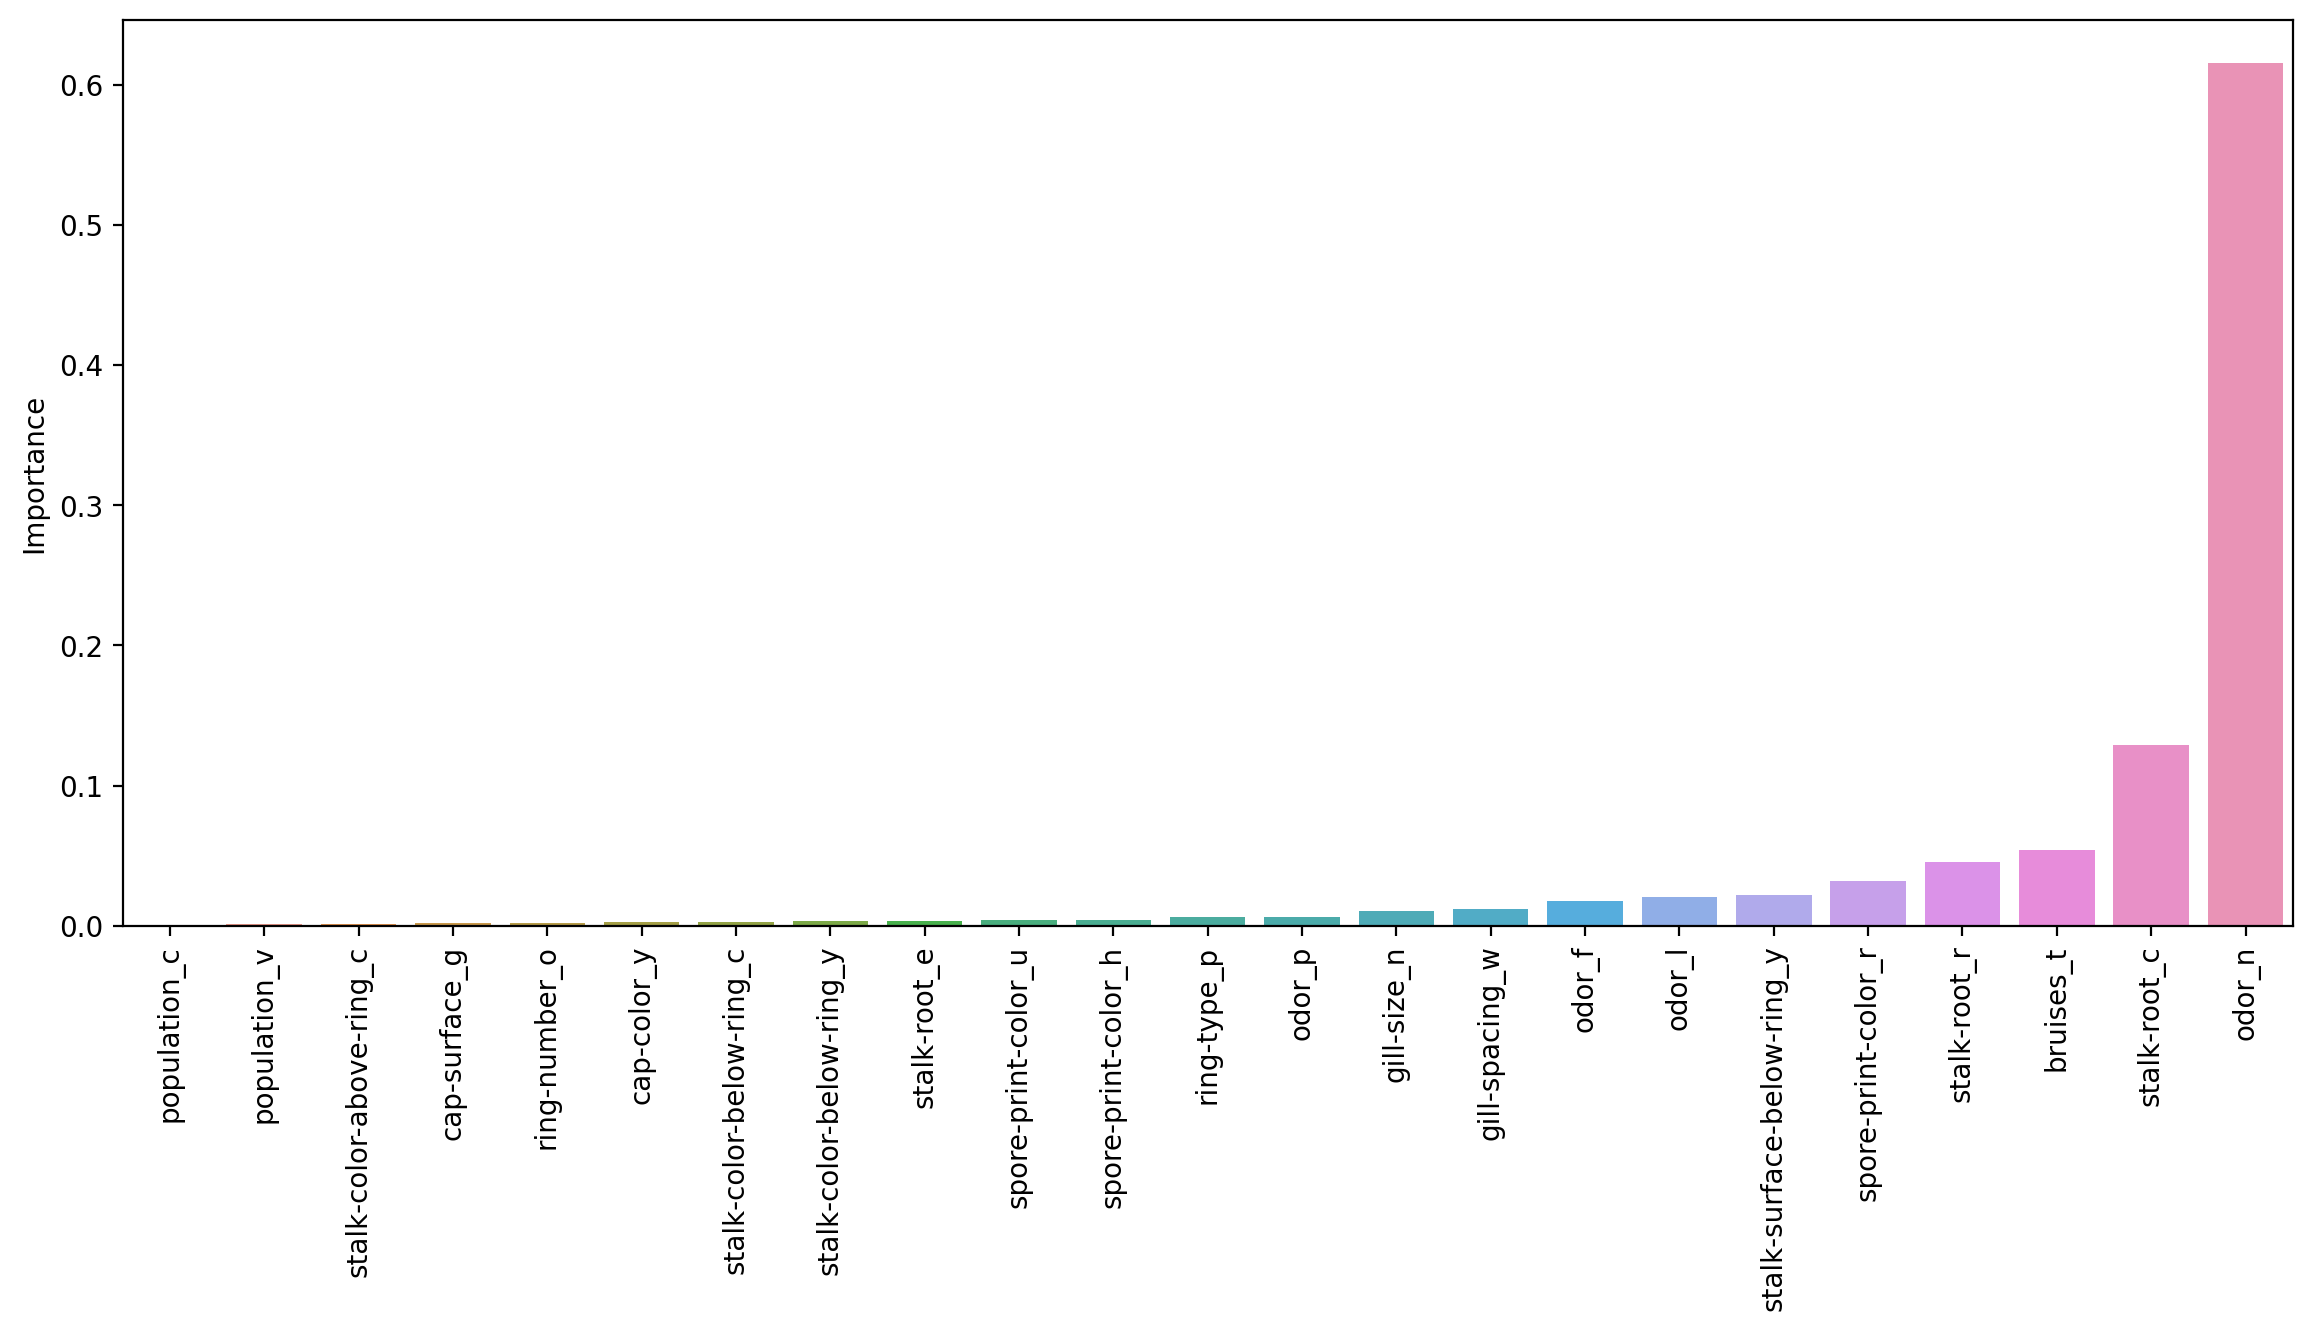

In [22]:
feats = grid.best_estimator_.feature_importances_
important_feat = pd.DataFrame(index=x.columns,
                             data=feats,
                             columns=['Importance'])
important_feat = important_feat[important_feat['Importance'] >0.0005].sort_values('Importance')


plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data = important_feat,
           x=important_feat.index,
           y='Importance')
plt.xticks(rotation=90)